<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_JNJ_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-01 18:18:16--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.137.100, 74.125.137.102, 74.125.137.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lpsuclcm9ofnlt5jl9pkf6io327p3fpm/1672597050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=87ffe557-d973-4877-bee2-8e9f225483c9 [following]
--2023-01-01 18:18:16--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lpsuclcm9ofnlt5jl9pkf6io327p3fpm/1672597050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=87ffe557-d973-4877-bee2-8e9f225483c9
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to doc-0

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/JNJ_2008_Q1_20080415發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.0,proper noun,root,True,False,False,False
1,&,0.0,0.0,coordinating conjunction,coordinating conjunction,False,False,True,False
2,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
3,(,0.0,0.0,punctuation,punctuation,False,False,True,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
11071,You,0.0,0.0,pronoun,nominal subject,True,True,False,False
11072,may,0.0,0.0,auxiliary,auxiliary,True,True,False,False
11073,now,0.0,0.0,adverb,adverbial modifier,True,True,False,False
11074,disconnect,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          11076 non-null  object 
 1   Polarity      11076 non-null  float64
 2   Subjectivity  11076 non-null  float64
 3   Pos_          11076 non-null  object 
 4   Dep_          11073 non-null  object 
 5   Alpha         11076 non-null  bool   
 6   Stopword      11076 non-null  bool   
 7   Punct         11076 non-null  bool   
 8   Num           11076 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 476.0+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.0,proper noun,root,True,False,False,False
2,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
6,JNJ,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
10,Earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
11063,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
11065,quarter,0.0,0.0,noun,modifier of nominal,True,False,False,False
11067,earnings,0.0,0.0,noun,compound,True,False,False,False
11068,conference,0.0,0.0,noun,compound,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
10,Earnings,0.0,0.0,noun,compound,True,False,False,False
77,morning,0.0,0.0,noun,appositional modifier,True,False,False,False
79,welcome,0.8,0.9,adjective,conjunct,True,False,False,False
86,quarter,0.0,0.0,noun,modifier of nominal,True,False,False,False
88,earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
11059,today,0.0,0.0,noun,noun phrase as adverbial modifier,True,False,False,False
11065,quarter,0.0,0.0,noun,modifier of nominal,True,False,False,False
11067,earnings,0.0,0.0,noun,compound,True,False,False,False
11068,conference,0.0,0.0,noun,compound,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
99,like,0.0,0.00,verb,root,True,False,False,False
103,conference,0.0,0.00,noun,direct object,True,False,False,False
112,begin,0.0,0.00,verb,root,True,False,False,False
116,morning,0.0,0.00,noun,root,True,False,False,False
140,morning,0.0,0.00,noun,noun phrase as adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
11051,great,0.8,0.75,adjective,adjectival modifier,True,False,False,False
11052,day,0.0,0.00,noun,direct object,True,False,False,False
11058,concludes,0.0,0.00,verb,root,True,False,False,False
11059,today,0.0,0.00,noun,noun phrase as adverbial modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
187,available,0.4,0.40,adjective,object predicate,True,False,False,False
190,broader,0.0,0.00,adjective,adjectival modifier,True,False,False,False
194,webcast,0.0,0.00,noun,adjectival modifier,True,False,False,False
223,earlier,0.0,0.50,adverb,adverbial modifier,True,False,False,False
229,showing,0.0,0.00,verb,clausal modifier of noun (adjectival clause),True,False,False,False
...,...,...,...,...,...,...,...,...,...
10987,critical,0.0,0.80,adjective,adjectival complement,True,False,False,False
11005,forward,0.0,0.00,adverb,adverbial modifier,True,False,False,False
11023,medical,0.0,0.00,adjective,adjectival modifier,True,False,False,False
11042,continued,0.0,0.00,verb,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    890.000000
mean       0.063033
std        0.205880
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.062500
max        0.800000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    890.000000
mean       0.243753
std        0.312494
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
187,available,0.4,0.40,adjective,object predicate,True,False,False,False,Positive,Subjective
190,broader,0.0,0.00,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
194,webcast,0.0,0.00,noun,adjectival modifier,True,False,False,False,Neutral,Objective
223,earlier,0.0,0.50,adverb,adverbial modifier,True,False,False,False,Neutral,Subjective
229,showing,0.0,0.00,verb,clausal modifier of noun (adjectival clause),True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
10987,critical,0.0,0.80,adjective,adjectival complement,True,False,False,False,Neutral,Subjective
11005,forward,0.0,0.00,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
11023,medical,0.0,0.00,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
11042,continued,0.0,0.00,verb,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,79
1,Neutral,Objective,485
2,Neutral,Subjective,89
3,Positive,Subjective,237


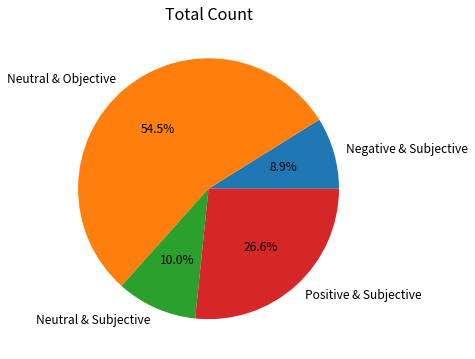

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

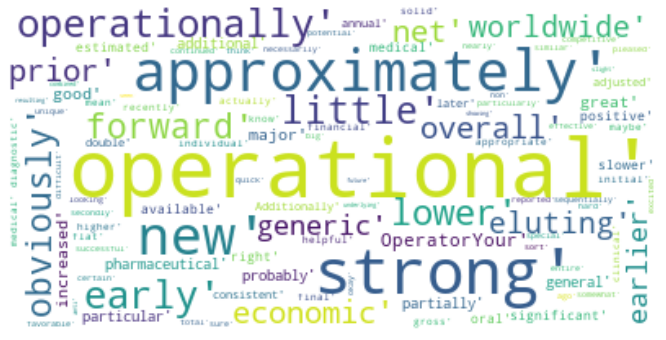

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Johnson & Johnson (NYSE:JNJ) Q1 2008 Earnings ...,0.35,0.411111
1,(Operator Instructions),0.00,0.000000
2,I would now like to turn the conference over t...,0.00,0.000000
3,You may begin.,0.00,0.000000
4,Louise MehrotraGood morning and welcome.,0.80,0.900000
...,...,...,...
459,I look forward to speaking with you again at o...,0.00,0.000000
460,Thank you for your continued support of Johnso...,0.80,0.750000
461,OperatorThank you.,0.00,0.000000
462,This concludes today’s Johnson & Johnson first...,0.25,0.333333


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    464.000000
mean       0.090871
std        0.194300
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.185848
max        0.800000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    464.000000
mean       0.283968
std        0.247644
min        0.000000
25%        0.000000
50%        0.292775
75%        0.448437
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Johnson & Johnson (NYSE:JNJ) Q1 2008 Earnings ...,0.35,0.411111,Positive,Subjective
1,(Operator Instructions),0.00,0.000000,Neutral,Objective
2,I would now like to turn the conference over t...,0.00,0.000000,Neutral,Objective
3,You may begin.,0.00,0.000000,Neutral,Objective
4,Louise MehrotraGood morning and welcome.,0.80,0.900000,Positive,Subjective
...,...,...,...,...,...
459,I look forward to speaking with you again at o...,0.00,0.000000,Neutral,Objective
460,Thank you for your continued support of Johnso...,0.80,0.750000,Positive,Subjective
461,OperatorThank you.,0.00,0.000000,Neutral,Objective
462,This concludes today’s Johnson & Johnson first...,0.25,0.333333,Positive,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,73
1,Neutral,Objective,134
2,Neutral,Subjective,41
3,Positive,Subjective,216


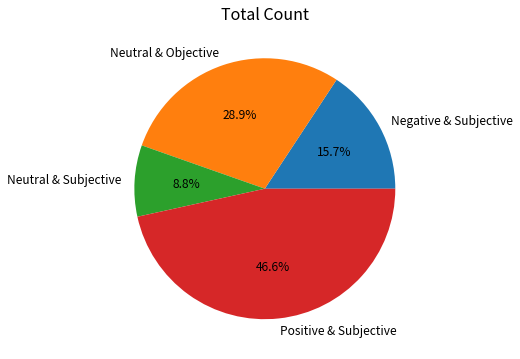

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

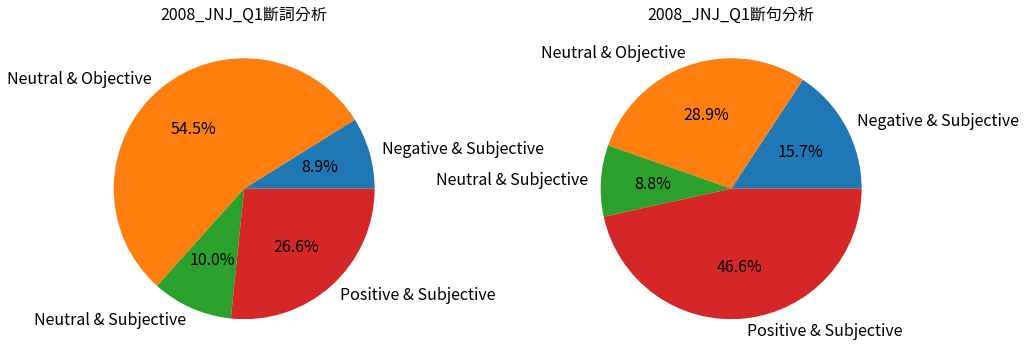

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]



axs[0].pie(size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_JNJ_Q1斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_JNJ_Q1斷句分析', fontsize=16)


plt.savefig("2008_JNJ_Q1.png")
from google.colab import files
files.download("2008_JNJ_Q1.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
